## Predicting hydrocarbon boiling points

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

Importing the data set

In [2]:
#Hydrocarbon dataframe

hc_df = pd.read_csv('hc-long-list.csv')

In [3]:
hc_df

,name,IUPAC,nC,mp,bp
0,N-alkane,Methane,1,-183,-162
1,N-alkane,Ethane,2,-183,-89
2,N-alkane,Propane,3,-188,-42
3,N-alkane,N-butane,4,-138,-1
4,N-alkane,N-pentane,5,-130,36
5,N-alkane,N-hexane,6,-95,69
6,N-alkane,N-heptane,7,-91,98
7,N-alkane,N-octane,8,-57,126
8,N-alkane,N-nonane,9,-53,151
9,N-alkane,N-decane,10,-30,174


In [4]:
hc_df.head()

,name,IUPAC,nC,mp,bp
0,N-alkane,Methane,1,-183,-162
1,N-alkane,Ethane,2,-183,-89
2,N-alkane,Propane,3,-188,-42
3,N-alkane,N-butane,4,-138,-1
4,N-alkane,N-pentane,5,-130,36


In [5]:
hc_df.tail()

,name,IUPAC,nC,mp,bp
33,N-alkane,N-tetracontane,40,81,522
34,N-alkane,N-pentacontane,50,92,575
35,N-alkane,N-hexacontane,60,100,625
36,N-alkane,N-heptacontane,70,106,647
37,N-alkane,N-octacontane,80,112,672


In [6]:
hc_df.describe()

,nC,mp,bp
count,38.000000,38.000000,38.000000
mean,22.710526,5.578947,306.236842
std,18.058326,83.834338,203.578318
min,1.000000,-188.000000,-162.000000
25%,10.250000,-29.000000,179.500000
50%,19.500000,34.500000,337.000000
75%,28.750000,63.250000,441.000000
max,80.000000,112.000000,672.000000


In [7]:
x, y = hc_df['nC'], hc_df['bp']

In [8]:
x

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
27    28
28    29
29    30
30    31
31    32
32    35
33    40
34    50
35    60
36    70
37    80
Name: nC, dtype: int64

In [9]:
y

0    -162
1     -89
2     -42
3      -1
4      36
5      69
6      98
7     126
8     151
9     174
10    196
11    216
12    235
13    254
14    270
15    287
16    303
17    316
18    330
19    344
20    359
21    369
22    381
23    391
24    402
25    415
26    422
27    435
28    443
29    451
30    458
31    470
32    489
33    522
34    575
35    625
36    647
37    672
Name: bp, dtype: int64

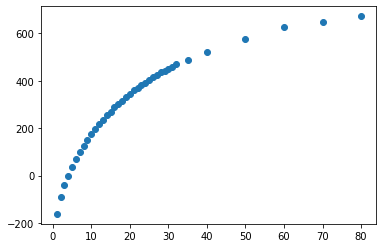

In [10]:
plt.scatter(x, y)

Text(0.5, 1.0, 'Boiling points of linear hydrocarbons')

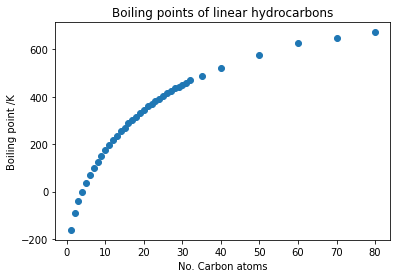

In [11]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel('No. Carbon atoms')
ax.set_ylabel('Boiling point /K')
ax.set_title('Boiling points of linear hydrocarbons')

Going to just pull the columns we want

In [12]:
new_linear_regression_hc_df = hc_df[['nC', 'bp']].copy()
new_linear_regression_hc_df

,nC,bp
0,1,-162
1,2,-89
2,3,-42
3,4,-1
4,5,36
5,6,69
6,7,98
7,8,126
8,9,151
9,10,174


In [13]:
new_lr_hc_df = new_linear_regression_hc_df

x_LR = new_lr_hc_df.iloc[:, 0].values.reshape(-1, 1)
y_LR = new_lr_hc_df.iloc[:, 1].values.reshape(-1, 1)

Can't just do a regression on all the data, otherwise we can't test it on new data (cause we don't have any!). So, we'll split up the data into *training* data and *testing* data.

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_LR, y_LR, test_size = 0.1, random_state = 0)
# test_size gives the proportion of the data that will be used for testing as opposed to training

In [15]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [16]:
print(regressor.intercept_)
print(regressor.coef_)

[69.58791912]
[[10.10168694]]


In [17]:
y_pred = regressor.predict(x_test)

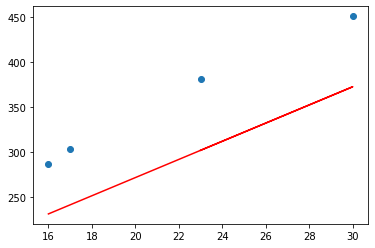

In [18]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'red')

Text(0.5, 1.0, 'Predictions of boiling points using linear regression')

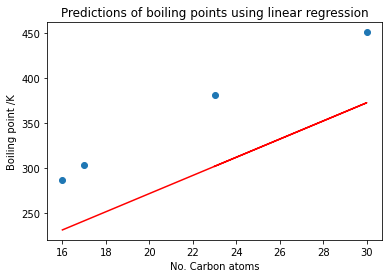

In [19]:
fig_1, ax_1 = plt.subplots()
ax_1.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'red')
ax_1.set_xlabel('No. Carbon atoms')
ax_1.set_ylabel('Boiling point /K')
ax_1.set_title('Predictions of boiling points using linear regression')

## Multilinear regresssion test

In [20]:
x_mr_df = hc_df[['nC', 'mp']]
y_mr_df = hc_df['bp']

In [24]:
mr_regressor = LinearRegression()

In [25]:
mr_regressor.fit(x_mr_df, y_mr_df)

LinearRegression()

In [26]:
print('Intercept: \n', mr_regressor.intercept_)
print('Coefficients: \n', mr_regressor.coef_)

Intercept: 
 208.27904270615383
Coefficients: 
 [3.89548558 1.70090716]


In [29]:
x_mr_df = sm.add_constant(x_mr_df)

In [30]:
model = sm.OLS(y_mr_df, x_mr_df).fit()

In [31]:
predictions = model.predict(x_mr_df)

In [32]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     bp   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1699.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):           1.40e-35
Time:                        13:12:19   Log-Likelihood:                -168.29
No. Observations:                  38   AIC:                             342.6
Df Residuals:                      35   BIC:                             347.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        208.2790      7.578     27.485      0.0

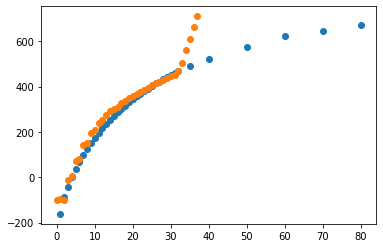

In [34]:
plt.scatter(x, y)
plt.scatter(range(len(predictions)), predictions)

Text(0.5, 1.0, 'Predictions of boiling points using multilinear regression')

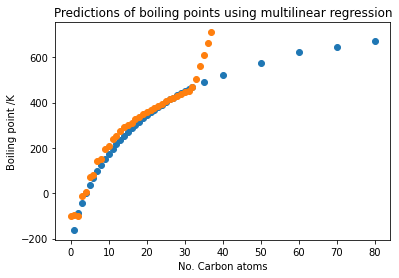

In [36]:
fig_2, ax_2 = plt.subplots()
ax_2.scatter(x, y)
plt.scatter(range(len(predictions)), predictions)
ax_2.set_xlabel('No. Carbon atoms')
ax_2.set_ylabel('Boiling point /K')
ax_2.set_title('Predictions of boiling points using multilinear regression')